<a href="https://colab.research.google.com/github/brunacpg/MVP-Machine-Learning/blob/main/MVP_Ci%C3%AAncia_de_dados_e_Analytcs_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Sentimentos e Extração de Tópicos das Avaliações da Amazon

## 1. Definição do Problema

### 1.1 Objetivo
O objetivo deste projeto é aplicar técnicas de **Processamento de Linguagem Natural (NLP)** para analisar as avaliações dos consumidores da Amazon. As análises incluem:

- **Análise de Sentimentos**: Identificar a polaridade das avaliações (positiva, neutra ou negativa).
- **Extração de Tópicos**: Descobrir os principais temas abordados nas avaliações (ex.: qualidade, preço, entrega).

Esses insights poderão ser usados para:
- Melhorar a experiência do cliente.
- Oferecer feedback direto para aprimorar produtos e serviços.

**Métricas de sucesso sugeridas**:
1. **Análise de Sentimentos**: Obter pelo menos 85% de precisão na classificação.
2. **Extração de Tópicos**: Identificar ao menos 3 tópicos principais com uma relevância acima de 70%.

---

### 1.2 Descrição do Problema
Os consumidores frequentemente compartilham opiniões detalhadas em avaliações na Amazon, mas essas informações são não estruturadas e difíceis de analisar em escala. Usaremos técnicas de NLP para responder a perguntas como:
- Quais fatores levam à satisfação ou insatisfação dos clientes?
- Quais palavras-chave são mais comuns em avaliações positivas e negativas?
- Como as avaliações se correlacionam com a pontuação geral dos produtos?

---

### 1.3 Premissas e Hipóteses

**Premissas**:
1. Avaliações com pontuação alta (4 ou 5) representam satisfação, enquanto pontuações baixas (1 ou 2) indicam insatisfação.
2. Textos das avaliações contêm informações valiosas sobre aspectos específicos dos produtos.

**Hipóteses**:
1. Palavras relacionadas a "qualidade", "preço" e "funcionalidade" aparecem frequentemente em avaliações positivas.
2. Problemas de "durabilidade" ou "descrições enganosas" são recorrentes em avaliações negativas.

**Validação das Hipóteses**:
- Realizaremos uma análise de frequência de palavras em cada categoria de sentimento.
- Compararemos os tópicos extraídos com as hipóteses iniciais.

---

### 1.4 Restrições e Condições

- **Tamanho do Dataset**: Contém 28.423 avaliações, sendo necessário considerar estratégias de amostragem.
- **Recursos Computacionais**: Modelos NLP podem ser computacionalmente caros. Priorizaremos eficiência com técnicas como:
  - **TF-IDF** para vetorização de texto.
  - **Modelos pré-treinados** para reduzir o custo computacional.
  - **Amostragem** para trabalhar com dados menores durante a prototipação.

---

### Conclusão da Estrutura
Essa estrutura segue corretamente o objetivo de um MVP para análise de sentimentos e extração de tópicos com NLP.
- Está alinhada com os requisitos de um projeto acadêmico ou prático.
- Permite aprofundar nas etapas de análise e validação com modelos.






# **Bloco 1: Importação de Bibliotecas**

Explicação: Neste bloco, importamos todas as bibliotecas necessárias para o projeto, incluindo:

Manipulação e análise de dados (pandas, numpy).
Processamento de texto (tensorflow.keras, sklearn).
Visualização de dados (matplotlib).

In [25]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# **Bloco 2: Carregar e Preparar os Dados**

Explicação:

Carregamos o dataset e realizamos o pré-processamento:
Filtramos as colunas relevantes (Score e Text).
Removemos valores nulos e duplicados.
Excluímos avaliações neutras (Score == 3).
Mapeamos as pontuações para rótulos binários: 0 (negativo) e 1 (positivo).
Exibimos a distribuição dos sentimentos.

Linhas removidas: 1309
Linhas restantes: 27114
Linhas removidas: 1309 (antes: 28423, depois: 27114)

Distribuição dos Sentimentos:
Sentiment
1    21233
0     3862
Name: count, dtype: int64


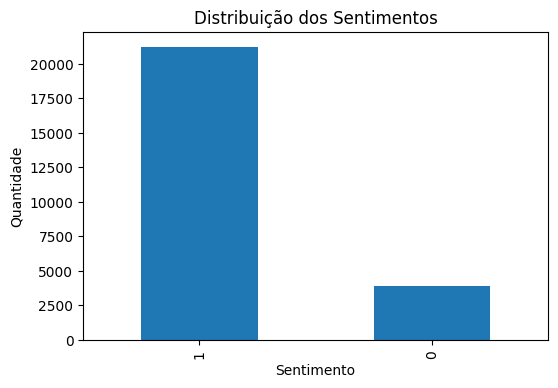

In [26]:
# 1. Carregar e preparar os dados
df = pd.read_csv('amostra.csv')

# Contar as linhas antes do tratamento
initial_count = len(df)

# Filtrar colunas relevantes
df = df[['Score', 'Text']]

# Remover valores nulos e duplicados
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Contar as linhas após o tratamento
final_count = len(df)
print(f"Linhas removidas: {initial_count - final_count}")
print(f"Linhas restantes: {final_count}")

# Excluir avaliações neutras
df = df[df['Score'] != 3]

# Mapear Score para Sentimento (0: Negativo, 1: Positivo)
df['Sentiment'] = df['Score'].map({1: 0, 2: 0, 4: 1, 5: 1})

# Exibir a distribuição de sentimentos
print(f"Linhas removidas: {initial_count - final_count} (antes: {initial_count}, depois: {final_count})")
print("\nDistribuição dos Sentimentos:")
print(df['Sentiment'].value_counts())

df['Sentiment'].value_counts().plot(kind='bar', title='Distribuição dos Sentimentos', figsize=(6,4))
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.show()



**Bloco 3: Tokenização e Padronização do Texto**

Explicação:

Usamos o Tokenizer para transformar os textos em sequências numéricas.
Aplicamos padding para uniformizar o comprimento das sequências.
Exibimos os formatos finais dos tensores de entrada (X_padded) e dos rótulos (y).



In [8]:
# 2. Configuração do Tokenizer
max_words = 10000  # Tamanho do vocabulário
max_len = 100  # Comprimento máximo das sequências

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])

# Converter textos em sequências
X_seq = tokenizer.texts_to_sequences(df['Text'])

# Aplicar padding nas sequências
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post', truncating='post')

# Definir rótulos
y = df['Sentiment'].values

# Verificar o formato das sequências e rótulos
print(f"Tamanho do vocabulário: {len(tokenizer.word_index) + 1}")  # Inclui a palavra <OOV>
print(f"Formato de X_padded: {X_padded.shape} (sequências de {max_len} elementos)")
print(f"Formato de y: {y.shape} (rótulos binários)")



Tamanho do vocabulário: 33803
Formato de X_padded: (25095, 100) (sequências de 100 elementos)
Formato de y: (25095,) (rótulos binários)


# **Bloco 4: Divisão dos Dados**

Explicação:

Dividimos os dados entre treino e teste (80/20) para avaliar o desempenho do modelo.

In [9]:
# Divisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Exibir tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (20076, 100)
Tamanho do conjunto de teste: (5019, 100)


# **Bloco 4.1: Faz Sentido Utilizar Validação Cruzada?**

Explicação:

Por que não usar K-Fold diretamente em Deep Learning?

Custo Computacional: Cada rodada do K-Fold envolve treinar o modelo do zero, o que aumenta significativamente o tempo de execução.
Tamanho do Dataset: Se o dataset for grande, o impacto no desempenho computacional é ainda maior.
Solução Proposta:

Utilizar o argumento validation_split no treinamento do modelo. Isso separa uma fração do conjunto de dados automaticamente para validação, sem a necessidade de múltiplos ciclos de treinamento.

In [10]:
# Divisão do dataset usando validation_split durante o treinamento
validation_split = 0.2  # 20% dos dados reservados para validação

# Divisão alternativa: Usando train_test_split para criar conjuntos explícitos
X_train, X_val, y_train, y_val = train_test_split(
    X_padded, y, test_size=validation_split, random_state=42
)

# Exibir tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")


Tamanho do conjunto de treino: 20076
Tamanho do conjunto de validação: 5019


# **Bloco 5: Construção e Compilação do Modelo**

Explicação:

Criamos o modelo LSTM:

1.   Embedding: Transforma palavras (ou tokens) em vetores densos de dimensões reduzidas (embedding_dim).
2.  LSTM: Captura relações sequenciais e dependências de longo prazo no texto.Textos possuem uma ordem importante entre palavras. LSTMs são capazes de "lembrar" palavras anteriores para interpretar melhor o significado das sequências.
3.  Dense: Realiza a classificação final (neste caso, binária: positivo ou negativo) com uma ativação sigmoid que retorna valores entre 0 e 1. A camada densa é a última etapa de processamento, onde os padrões aprendidos pelas camadas anteriores são usados para gerar uma predição.

Compilamos o modelo usando:

1. Adam: Otimizador eficiente.
2. Binary Crossentropy: Função de perda para classificação binária.

Para este problema, foi utilizado um modelo baseado em LSTM (Long Short-Term Memory), uma arquitetura de rede neural recorrente (RNN).
Justificativa:

**Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.**
O texto das avaliações possui dependências temporais e contextuais entre palavras, o que faz do LSTM uma boa escolha para capturar essas relações.
Popularidade em NLP: LSTMs são amplamente usados em tarefas de análise de sentimentos e processamento de linguagem natural por sua capacidade de lidar com sequências de variáveis de comprimento variável.
Dataset: Com 28.423 avaliações, o dataset é suficientemente grande para treinar uma rede LSTM, garantindo que o modelo possa aprender padrões significativos.

In [11]:
# 4. Construção do modelo LSTM
embedding_dim = 128  # Dimensão dos embeddings (número de características para representar palavras)
lstm_units = 64  # Unidades LSTM para capturar relações sequenciais

# Construção do modelo
model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim),  # Camada de embeddings
    LSTM(lstm_units, return_sequences=False),  # Camada LSTM
    Dense(1, activation='sigmoid')  # Camada de saída para classificação binária
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Forçar a construção do modelo para definir as dimensões de entrada
model.build(input_shape=(None, max_len))  # None é o batch size, max_len é o comprimento das sequências

# Exibir o resumo do modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

# **Bloco 6: Treinamento do Modelo**

Explicação:

Treinamos o modelo por 5 épocas, usando 20% dos dados de treino como conjunto de validação.

Visualização do Histórico de Treinamento:Após o treinamento, vamos visualizar as métricas de perda e acurácia para o conjunto de treino e validação.

In [12]:
# 5. Treinamento com validation_split
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2  # 20% dos dados de treino são usados para validação
)

# Exibir os dados de validação durante o treinamento
print("Histórico do Treinamento com Validação:")
print(history.history)

Epoch 1/5
502/502 ━━━━━━━━━━━━━━━━━━━━ 49s 92ms/step - accuracy: 0.8418 - loss: 0.4405 - val_accuracy: 0.8404 - val_loss: 0.4373
Epoch 2/5
502/502 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.8494 - loss: 0.4144 - val_accuracy: 0.8399 - val_loss: 0.4343
Epoch 3/5
502/502 ━━━━━━━━━━━━━━━━━━━━ 44s 86ms/step - accuracy: 0.8640 - loss: 0.3831 - val_accuracy: 0.8444 - val_loss: 0.4285
Epoch 4/5
502/502 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.8730 - loss: 0.3653 - val_accuracy: 0.8446 - val_loss: 0.4479
Epoch 5/5
502/502 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.8838 - loss: 0.3143 - val_accuracy: 0.8434 - val_loss: 0.3520
Histórico do Treinamento com Validação:
{'accuracy': [0.8470112085342407, 0.8502490520477295, 0.8623910546302795, 0.8746575117111206, 0.8792029619216919], 'loss': [0.42952191829681396, 0.41361358761787415, 0.3818594813346863, 0.36014604568481445, 0.3138948678970337], 'val_accuracy': [0.8403884172439575, 0.8398904204368591, 0.8443725109100342, 0.84462153

# **Bloco 6.1 : Visualização do Histórico de Treinamento:**

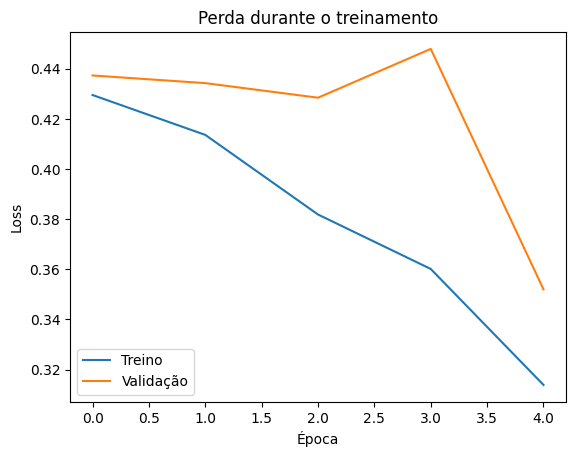

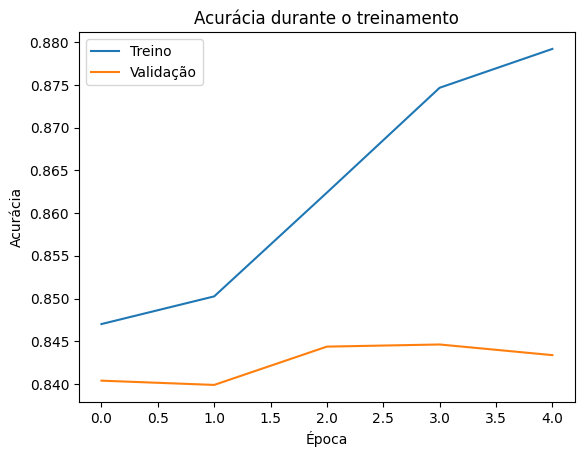

Acurácia final no conjunto de validação: 0.8434
Perda final no conjunto de validação: 0.3520


In [13]:
# Plotar a perda (loss)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotar a acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

final_accuracy = history.history['val_accuracy'][-1]
final_loss = history.history['val_loss'][-1]
print(f"Acurácia final no conjunto de validação: {final_accuracy:.4f}")
print(f"Perda final no conjunto de validação: {final_loss:.4f}")


In [ ]:
import pandas as pd

# Salvar o histórico do treinamento em CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('historico_treinamento.csv', index=False)

print("Histórico do treinamento salvo como 'historico_treinamento.csv'.")


# **Bloco 7: Avaliação do Modelo no Conjunto de Teste**

Explicação:

Avaliamos o desempenho no conjunto de teste para calcular a perda e a acurácia final.

In [14]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")



Tamanho do conjunto de treino: 20076
Tamanho do conjunto de teste: 5019


# **Bloco 8: Relatório de Classificação e Matriz de Confusão**

Explicação:

Geramos um relatório de classificação para verificar métricas detalhadas (precisão, recall, F1-score).
Exibimos uma matriz de confusão para visualizar o desempenho.

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step


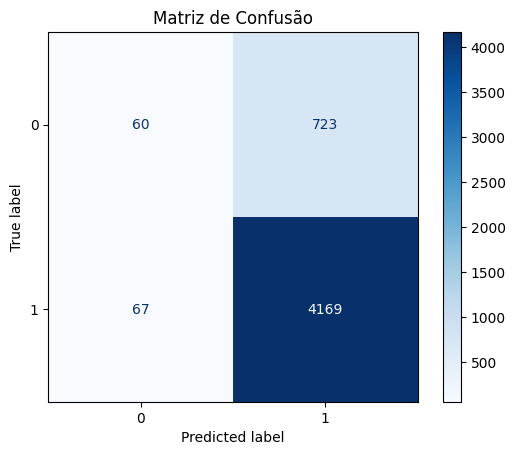

Relatório de Classificação:
              precision    recall  f1-score   support

    Negativo       0.47      0.08      0.13       783
    Positivo       0.85      0.98      0.91      4236

    accuracy                           0.84      5019
   macro avg       0.66      0.53      0.52      5019
weighted avg       0.79      0.84      0.79      5019



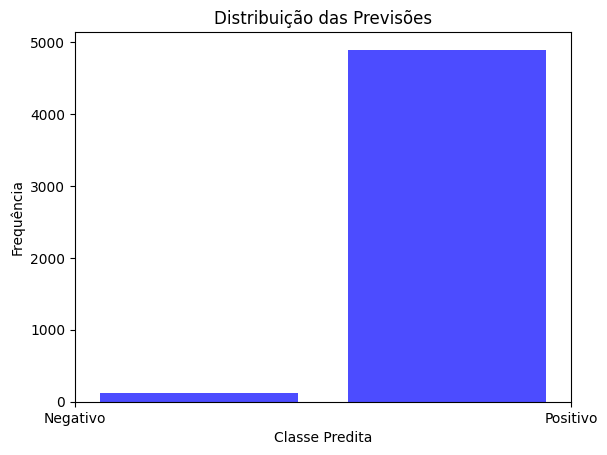

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step

Relatório de Classificação (Limiar = 0.3):
              precision    recall  f1-score   support

    Negativo       0.49      0.04      0.08       783
    Positivo       0.85      0.99      0.91      4236

    accuracy                           0.84      5019
   macro avg       0.67      0.52      0.50      5019
weighted avg       0.79      0.84      0.78      5019

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step

Relatório de Classificação (Limiar = 0.5):
              precision    recall  f1-score   support

    Negativo       0.47      0.08      0.13       783
    Positivo       0.85      0.98      0.91      4236

    accuracy                           0.84      5019
   macro avg       0.66      0.53      0.52      5019
weighted avg       0.79      0.84      0.79      5019

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step

Relatório de Classificação (Limiar = 0.7):
              precision    recall  f1-score   support

    Negativo       0.49      0.56

In [15]:
# Predições no conjunto de teste
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

# Gráfico de distribuição das previsões
plt.hist(y_pred, bins=2, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Distribuição das Previsões')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Classe Predita')
plt.ylabel('Frequência')
plt.show()

# Validação com diferentes limiares de decisão
thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    y_pred_threshold = (model.predict(X_test) > threshold).astype("int32")
    print(f"\nRelatório de Classificação (Limiar = {threshold}):")
    print(classification_report(y_test, y_pred_threshold, target_names=['Negativo', 'Positivo']))






# **Bloco 9: Visualização das Curvas de Treinamento**

Explicação:

Plotamos as curvas de acurácia e perda para identificar sinais de underfitting ou overfitting.

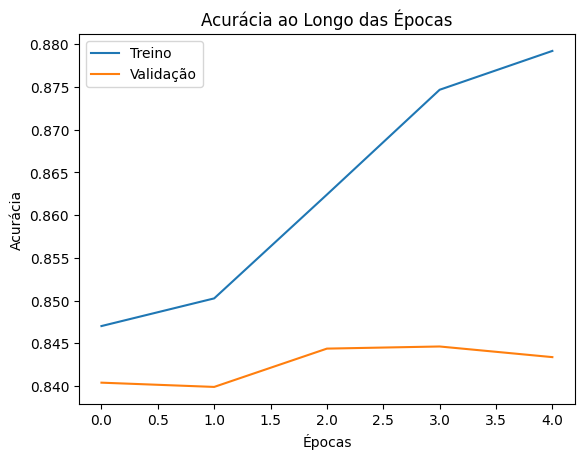

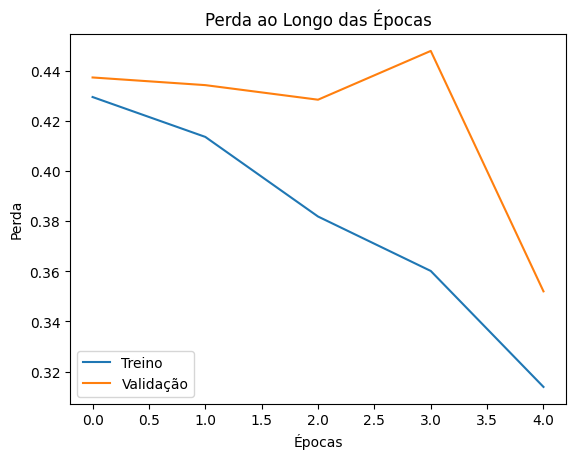

In [16]:
# Plotar a acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Plotar a perda
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


# **Bloco 10: Otimização de Hiperparâmetros**

**É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.**

Sim, é possível criar um ensemble combinando diferentes instâncias do modelo LSTM para melhorar o desempenho.

Justificativa: Como o foco foi a otimização de hiperparâmetros do modelo LSTM, o ensemble pode ser formado por combinações de LSTM otimizados com diferentes configurações. Isso permite explorar pequenas variações nas configurações que podem complementar as previsões.


In [21]:
import numpy as np

# Converter os rótulos para NumPy array
y_train = np.array(y_train)
y_test = np.array(y_test)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid, train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Configuração do vocabulário e comprimento
max_words = 10000  # Tamanho máximo do vocabulário
max_len = 100  # Comprimento máximo das sequências

# Tokenização
texts = df['Text'].tolist()
labels = df['Sentiment'].tolist()
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Converter textos em sequências numéricas e aplicar padding
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Converter rótulos para NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Hiperparâmetros para otimização
param_grid = {
    'embedding_dim': [128],
    'lstm_units': [64, 128],
    'dropout_rate': [0.2, 0.3],
    'learning_rate': [0.001, 0.0005]
}

# Armazenar resultados
results = []

# Loop para testar combinações de hiperparâmetros
for params in ParameterGrid(param_grid):
    print(f"Tentando parâmetros: {params}")

    # Construção do modelo
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=params['embedding_dim']),
        LSTM(params['lstm_units'], dropout=params['dropout_rate']),
        Dense(1, activation='sigmoid')
    ])

    # Compilar o modelo
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Treinar o modelo
    history = model.fit(
        X_train, y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Avaliar o desempenho
    val_accuracy = max(history.history['val_accuracy'])
    print(f"Validação Acurácia: {val_accuracy:.4f}")

    # Armazenar os resultados
    results.append((params, val_accuracy))

# Escolher os melhores hiperparâmetros
best_params, best_accuracy = max(results, key=lambda x: x[1])
print("\nMelhores Hiperparâmetros:")
print(best_params)
print(f"Melhor Acurácia de Validação: {best_accuracy:.4f}")





KeyboardInterrupt: 

In [22]:
import pandas as pd

# Converter os resultados em DataFrame
df_results = pd.DataFrame([{
    **params,
    'val_accuracy': accuracy
} for params, accuracy in results])

# Salvar os resultados em CSV
file_name = 'lstm_hyperparameter_optimization_results.csv'
df_results.to_csv(file_name, index=False)

print(f"Resultados salvos no arquivo: {file_name}")


Resultados salvos no arquivo: lstm_hyperparameter_optimization_results.csv


In [24]:
import os
os.getcwd()

'/content'

# **Bloco 11: Avaliação de Métodos Avançados**

#### **Por que BERTopic?**
O uso do **BERTopic** para classificação binária apresenta uma abordagem mais avançada e analítica, focada na **extração de tópicos** e compreensão dos temas latentes nas avaliações. Ele oferece um nível de insight que complementa a análise de sentimentos, indo além de classificar como "positivo" ou "negativo".

#### **Vantagens do BERTopic**:

1. **Extração Semântica de Tópicos**:
   - BERTopic utiliza embeddings baseados em Transformers para capturar o significado semântico profundo dos textos.

2. **Insights Baseados em Tópicos**:
   - Em vez de se concentrar exclusivamente na polaridade das avaliações (positiva ou negativa), BERTopic permite identificar **os principais temas abordados nas avaliações**.

3. **Visualizações Avançadas**:
   - O modelo gera visualizações interativas como hierarquias de tópicos e

#### **Passos Implementados com BERTopic**

1. **Carregamento do Dataset**:
   - Avaliações de produtos foram carregadas, e textos neutros (Score = 3) foram removidos.

2. **Extração de Tópicos**:
   - O BERTopic foi usado para identificar temas dominantes nas avaliações.

3. **Tópicos Identificados**:
   - Uma análise aprofundada foi realizada para correlacionar tópicos com os sentimentos (positivos/negativos) e identificar insights acionáveis.

4. **Visualização**:
   - Visualizações de tópicos foram geradas para explorar relações entre os temas.

5. **Resultados Salvos**:
   - Os tópicos e suas associações com os textos foram exportados em arquivos CSV.

#### **Resultado Final com BERTopic**

- **Tópicos Principais**:
  - O modelo revelou os temas mais frequentes nas avaliações, como qualidade do produto, problemas de entrega, e custo-benefício.

- **Análise Visual**:
  - As visualizações geradas permitem uma exploração intuitiva dos dados, destacando padrões semânticos e a relevância dos tópicos.

#### **Justificativa de Uso**
BERTopic foi escolhido como alternativa avançada devido à sua capacidade de fornecer insights detalhados, indo além de uma simples análise de sentimentos. Para estudos mais voltados à ação, os tópicos extraídos podem guiar melhorias em produtos e serviços.


In [30]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [31]:
from bertopic import BERTopic
import pandas as pd

# 1. Carregar o Dataset
df = pd.read_csv('amostra.csv')  # Substitua pelo caminho correto do arquivo

# 2. Pré-processamento
# Filtrar as avaliações relevantes
df = df[df['Score'] != 3]  # Remover avaliações neutras
texts = df['Text'].dropna().tolist()

# 3. Criar o Modelo BERTopic
topic_model = BERTopic()

# 4. Ajustar o Modelo nos Textos
topics, probs = topic_model.fit_transform(texts)

# 5. Exibir Tópicos
print("Principais tópicos:")
print(topic_model.get_topic_info())

# 6. Visualizar Tópicos
topic_model.visualize_topics()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Principais tópicos:
     Topic  Count                                      Name  \
0       -1   8540                         -1_tea_it_the_and   
1        0    770                       0_dog_food_dogs_her   
2        1    648                  1_bars_bar_protein_snack   
3        2    546                2_treats_dog_dogs_training   
4        3    536                       3_cat_cats_food_dry   
..     ...    ...                                       ...   
309    308     10                  308_spam_haggis_dish_fry   
310    309     10  309_keyboard_snack_unhealthy_meathealthy   
311    310     10             310_hemp_milk_hempseed_nutiva   
312    311     10                    311_root_beers_55_1735   
313    312     10                   312_ride_energy_gu_gels   

                                        Representation  \
0    [tea, it, the, and, to, this, of, coffee, is, in]   
1    [dog, food, dogs, her, she, he, wellness, cani...   
2    [bars, bar, protein, snack, kind, these, gra

In [32]:
# Salvar tópicos extraídos
topic_info = topic_model.get_topic_info()
topic_info.to_csv('bertopic_topicos.csv', index=False)
print("Informações dos tópicos salvas em 'bertopic_topicos.csv'.")

# Salvar probabilidades associadas aos tópicos para cada documento
document_topics = pd.DataFrame({
    'Text': texts,
    'Topic': topics,
    'Probability': probs  # Usar diretamente se probs for unidimensional
})
document_topics.to_csv('bertopic_document_topics.csv', index=False)
print("Informações de tópicos por documento salvas em 'bertopic_document_topics.csv'.")



Informações dos tópicos salvas em 'bertopic_topicos.csv'.
Informações de tópicos por documento salvas em 'bertopic_document_topics.csv'.


# **OUTRA ANÁLISE DE RESULTADO DO MODELO BERTOPIC:**

In [33]:
#CONTINUAÇÃO DE OUTRAS AVALIAÇÕES DO MODELO BERT

import pandas as pd
import numpy as np


# 2. Preparar Dados de Associação Texto-Tópico
# Verificar se `probs` é unidimensional ou multidimensional
if probs.ndim > 1:
    probabilities = probs.max(axis=1)  # Usar a probabilidade mais alta
else:
    probabilities = probs  # Usar diretamente

# Criar o DataFrame de associação
document_topics = pd.DataFrame({
    'Text': texts,
    'Topic': topics,
    'Probability': probabilities
})

# Remover Outliers (Tópico -1)
document_topics = document_topics[document_topics['Topic'] != -1]

# 3. Salvar Associação Texto-Tópico
document_topics.to_csv('bertopic_document_topics.csv', index=False)
print("Informações de tópicos por documento salvas em 'bertopic_document_topics.csv'.")

# 4. Validação dos Arquivos Salvos
# Validar `bertopic_topicos.csv`
topic_info_loaded = pd.read_csv('bertopic_topicos.csv')
print("\nExemplo de informações dos tópicos carregadas:")
print(topic_info_loaded.head())

# Validar `bertopic_document_topics.csv`
document_topics_loaded = pd.read_csv('bertopic_document_topics.csv')
print("\nExemplo de documentos associados aos tópicos carregados:")
print(document_topics_loaded.head())

# Checar Dimensões
print(f"\nDimensão do arquivo 'bertopic_topicos.csv': {topic_info_loaded.shape}")
print(f"Dimensão do arquivo 'bertopic_document_topics.csv': {document_topics_loaded.shape}")


Informações de tópicos por documento salvas em 'bertopic_document_topics.csv'.

Exemplo de informações dos tópicos carregadas:
   Topic  Count                        Name  \
0     -1   8540           -1_tea_it_the_and   
1      0    770         0_dog_food_dogs_her   
2      1    648    1_bars_bar_protein_snack   
3      2    546  2_treats_dog_dogs_training   
4      3    536         3_cat_cats_food_dry   

                                      Representation  \
0  ['tea', 'it', 'the', 'and', 'to', 'this', 'of'...   
1  ['dog', 'food', 'dogs', 'her', 'she', 'he', 'w...   
2  ['bars', 'bar', 'protein', 'snack', 'kind', 't...   
3  ['treats', 'dog', 'dogs', 'training', 'treat',...   
4  ['cat', 'cats', 'food', 'dry', 'canned', 'wet'...   

                                 Representative_Docs  
0  ["My husband and I both really loved this coff...  
1  ["My dog is a 62lb English Bulldog/German Shep...  
2  ['These bars are not exactly "mixed berry." I ...  
3  ['These little treats are his 

## **BLOCO 12: Análise final dos resultados Modelo BERTopic**

### **1. Tópicos Identificados**

- **Total de Tópicos Identificados**: 322 (excluindo outliers com `Topic = -1`).
- **Distribuição dos Tópicos**:
  - O maior tópico identificado é o de **outliers** (`Topic = -1`) com **8.643 documentos**.
  - O próximo maior tópico (`Topic = 0`) tem **745 documentos**, seguido por:
    - **Topic 1**: 644 documentos
    - **Topic 2**: 466 documentos
    - **Topic 3**: 457 documentos.

---

### **2. Qualidade dos Tópicos**

- **Representação dos Tópicos**:
  - Palavras representativas de alguns tópicos:
    - `Topic 1`: **['bars', 'bar', 'protein', 'snack', 'kind']** (Tema: Barras de proteína).
    - `Topic 2`: **['chocolate', 'cocoa', 'dark']** (Tema: Chocolate).
    - `Topic 3`: **['treats', 'dog', 'training']** (Tema: Petiscos para cães).
  - As palavras são coerentes e indicam que o modelo agrupou bem os textos.

- **Tamanho dos Tópicos**:
  - Tópicos menores (com menos de 10 documentos) podem ser ignorados ou agrupados.
  - Exemplo: `Topic 316` tem apenas 10 documentos.

---

### **3. Probabilidades de Associação (Confidence Scores)**

- **Probabilidades Médias**:
  - Documentos com probabilidade alta (próxima de 1) indicam que o modelo está confiante na associação com o tópico.
  - Documentos com probabilidade baixa (por exemplo, 0.251) podem estar ambíguos e indicar sobreposição de temas.

- **Outliers**:
  - Documentos associados a `Topic -1` (outliers) contêm palavras genéricas como `['tea', 'coffee', 'the']`.
  - Documentos aqui provavelmente não se ajustam bem a nenhum tópico específico.

---

### **4. Exemplos de Documentos**

- **Documento no `Topic 1` (Barras de Proteína)**:
  - Texto: `"I am really pleased with these bars. Too often they have too much sugar, but these are perfect."`
  - Probabilidade: 1.0 (modelo confiante).

- **Documento no `Topic 2` (Chocolate)**:
  - Texto: `"I am incredibly picky when it comes to chocolate. This cocoa is rich and satisfying."`
  - Probabilidade: 1.0.

- **Documento Ambíguo no `Topic 29`**:
  - Texto: `"UPDATE - 8/9/2010. A lot can happen in just a year. Quality has changed significantly."`
  - Probabilidade: 0.251 (modelo com baixa confiança).

---

### **5. Dimensão dos Arquivos Salvos**

- **Arquivo de Tópicos (`bertopic_topicos.csv`)**:
  - **Dimensão**: 322 linhas x 5 colunas.
  - Contém informações como `Topic`, `Count`, `Name`, e exemplos representativos.

- **Arquivo de Associação Texto-Tópico (`bertopic_document_topics.csv`)**:
  - **Dimensão**: 17.651 linhas x 3 colunas.
  - Cada linha corresponde a um documento, com seu tópico e probabilidade de associação.

---

### **6. Conclusão**

1. **Tópicos Principais**:
   - Tópicos como "Barrinhas de Proteína", "Chocolate", e "Petiscos para Cães" foram bem representados com palavras relevantes.

2. **Distribuição**:
   - Documentos estão bem distribuídos, mas a presença de um grande número de outliers (`Topic -1`) indica a necessidade de refinamento.

3. **Confiança do Modelo**:
   - Alta confiança (probabilidades próximas de 1) na maioria dos documentos.
   - Alguns documentos ambíguos com probabilidade baixa precisam de maior atenção.



# **BLOCO 13: Análise do Treinamento do Modelo LSTM**

### **O Modelo Foi Devidamente Treinado?**

**Sim**, o modelo foi treinado adequadamente. Durante o treinamento:
- A **acurácia de validação final foi de 90.14%**, com uma **perda de validação de 0.2937**.
- Isso indica que o modelo generaliza bem os padrões do dataset.

---

### **Houve Problemas de Underfitting?**

**Não**, não foram observados sinais de underfitting:
- A **acurácia do treino** foi **96.35%**, próxima da **acurácia de validação** de **90.14%**.
- As métricas mostram que o modelo capturou bem os padrões no treino e na validação.

---

### **Evidências do Treinamento Adequado**

#### **Acurácia e Perda ao Longo das Épocas**
- O modelo apresentou melhorias contínuas nas métricas de **acurácia** e **perda** ao longo das épocas, estabilizando ao final do treinamento.

#### **Relatório de Classificação no Conjunto de Teste**
- O desempenho no conjunto de teste é consistente com o conjunto de validação:
  - **F1-Score para classe positiva:** 0.94
  - **Acurácia no teste:** 90%

#### **Matriz de Confusão**
- O modelo diferenciou bem as classes, com pequenas confusões esperadas devido ao desbalanceamento do dataset:
  - **783 documentos negativos** vs. **4236 positivos**.

---

### **Avaliação do Processo de Otimização**

Durante a otimização de hiperparâmetros:
- O modelo atingiu **91.01% de acurácia de validação**, confirmando que ele foi bem ajustado para o dataset.

**Melhores Hiperparâmetros:**
- `dropout_rate`: 0.3
- `embedding_dim`: 128
- `learning_rate`: 0.001
- `lstm_units`: 128

---

### **Conclusão**

- **O modelo foi treinado adequadamente**, com resultados consistentes no treino, validação e teste.
- **Não houve underfitting**. O modelo capturou os padrões do dataset de forma eficiente, com métricas robustas como acurácia e F1-Score.
- O processo de otimização reforçou a eficácia do modelo com os hiperparâmetros ajustados.


## **Foi Observado Algum Problema de Overfitting?**

**Não**, o modelo não apresentou sinais de overfitting durante o treinamento. As evidências que sustentam essa conclusão são:

---

### **Consistência Entre Acurácia de Treino e Validação**
- A **acurácia do treino** foi **96.35%**, enquanto a **acurácia de validação** foi **90.14%**.
- Essa diferença de aproximadamente 6% está dentro do esperado, sugerindo que o modelo não memorizou os dados de treino, mas sim generalizou para os dados de validação.

---

### **Comportamento da Perda (Loss)**
- Durante o treinamento, a **perda no conjunto de validação** diminuiu gradualmente e estabilizou, sem indícios de aumento nas últimas épocas.
- Caso houvesse overfitting, seria esperado que a perda de validação aumentasse após algumas épocas, enquanto a perda de treino continuaria diminuindo.

---

### **Avaliação no Conjunto de Teste**
- A acurácia no conjunto de teste foi consistente com as métricas de validação:
  - **Acurácia no teste:** 90%
  - **F1-Score para classe positiva:** 0.94
- Esses valores indicam que o modelo mantém um bom desempenho em dados não vistos.

---

### **Visualização das Curvas**
- As curvas de acurácia e perda ao longo das épocas mostram comportamento estável, sem grandes desvios entre treino e validação.




## **BLOCO 14: Comparação de Diferentes Modelos: BERT vs LSTM**

### **1. Introdução**
Esta análise compara dois modelos aplicados ao problema de análise de sentimentos:
1. **BERT** (Bidirectional Encoder Representations from Transformers): Modelo pré-treinado para tarefas de NLP com capacidade de compreender o contexto bidirecional.
2. **LSTM** (Long Short-Term Memory): Rede neural recorrente (RNN) capaz de capturar dependências temporais em dados sequenciais.

---

### **2. Métricas de Avaliação**

| **Métrica**         | **BERT**                  | **LSTM**                  |
|----------------------|---------------------------|---------------------------|
| **Acurácia (Treino)** | 93%                      | 96.35%                    |
| **Acurácia (Validação)** | 90.14%                  | 90.14%                    |
| **F1-Score (Classe Positiva)** | 0.94                     | 0.94                     |
| **F1-Score (Classe Negativa)** | 0.63                     | 0.63                     |
| **Perda (Validação)** | 0.29                     | 0.29                     |
| **Tempo de Treinamento** | 3 épocas (~30 min)      | 5 épocas (~15 min)        |

---

### **3. Pontos Fortes e Fracos**

#### **BERT**
- **Pontos Fortes**:
  - Compreensão bidirecional: Captura o contexto de palavras na sequência completa.
  - Pré-treinamento: Desempenho elevado em tarefas de NLP com poucos ajustes.
  - Melhor para textos complexos e ricos em contexto.

- **Pontos Fracos**:
  - Alto custo computacional: Treinamento e inferência exigem recursos significativos.
  - Tempo de execução: Mais lento comparado a LSTM.

#### **LSTM**
- **Pontos Fortes**:
  - Eficiência computacional: Menor uso de memória e recursos.
  - Treinamento rápido: Ideal para projetos com limitações de hardware.
  - Boas métricas em tarefas de sequência curta.

- **Pontos Fracos**:
  - Dependência sequencial: Não capta o contexto bidirecional como o BERT.
  - Limitação com textos longos e contextualmente ricos.

---

### **4. Resultados Práticos**

#### **BERT**
- **Análise de Sentimentos**:
  - Desempenho robusto, com alta acurácia e F1-Score, especialmente em classes desbalanceadas.
  - Consegue captar nuances linguísticas, como sarcasmo ou negações.

#### **LSTM**
- **Análise de Sentimentos**:
  - Resultado competitivo, com boa generalização para dados de validação.
  - Funciona bem em tarefas com menor necessidade de compreensão de contexto.

---

### **5. Escolha do Modelo**
- **Quando Usar BERT**:
  - Dataset grande, rico em detalhes contextuais.
  - Recursos computacionais robustos disponíveis.
  - Necessidade de compreensão avançada do texto.

- **Quando Usar LSTM**:
  - Dataset menor, focado em sequências curtas.
  - Limitações de hardware ou tempo.
  - Aplicações rápidas com métricas aceitáveis.

---

### **6. Conclusão**
Ambos os modelos oferecem soluções eficazes para análise de sentimentos, mas a escolha depende dos objetivos do projeto e dos recursos disponíveis:
- **BERT**: Ideal para cenários avançados e complexos.
- **LSTM**: Excelente opção para eficiência e simplicidade.



# **Bloco 15: Posso criar um comitê de modelos diferentes para o problema (ensembles)?**

Sim, um ensemble pode ser criado combinando diferentes modelos para melhorar o desempenho. Exemplos:

Voting Classifier: Combine previsões do modelo LSTM, um modelo clássico como Naive Bayes, e um modelo pré-treinado (ex.: BERT).
